In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load all datasets
customer = pd.read_csv('/Users/jiale/Desktop/Group-Project/Dataset/olist_customers_dataset.csv', delimiter=',')
geolocation = pd.read_csv('/Users/jiale/Desktop/Group-Project/Dataset/olist_geolocation_dataset.csv', delimiter=',')
order_items = pd.read_csv('/Users/jiale/Desktop/Group-Project/Dataset/olist_order_items_dataset.csv', delimiter=',')
order_payments = pd.read_csv('/Users/jiale/Desktop/Group-Project/Dataset/olist_order_payments_dataset.csv', delimiter=',')
orders = pd.read_csv('/Users/jiale/Desktop/Group-Project/Dataset/olist_orders_dataset.csv', delimiter=',')
products = pd.read_csv('/Users/jiale/Desktop/Group-Project/Dataset/olist_products_dataset.csv', delimiter=',')
sellers = pd.read_csv('/Users/jiale/Desktop/Group-Project/Dataset/olist_sellers_dataset.csv', delimiter=',')
category_name_translation = pd.read_csv('/Users/jiale/Desktop/Group-Project/Dataset/product_category_name_translation.csv', delimiter=',')
review = pd.read_csv('/Users/jiale/Desktop/Group-Project/Dataset/olist_order_reviews_dataset.csv', delimiter=',')

In [10]:
products = pd.merge(products, category_name_translation, on='product_category_name', how='left')
products.drop(columns=['product_category_name'], inplace=True)
products.head(5)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [11]:
raw = orders.merge(order_items, on='order_id', how='left')
raw = raw.merge(order_payments, on='order_id', how='outer', validate='m:m')
raw = raw.merge(products, on='product_id', how='outer')
raw = raw.merge(customer, on='customer_id', how='outer')
raw = raw.merge(geolocation, left_on = 'customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='outer')
raw = raw.merge(sellers, on='seller_id', how='outer')
raw = raw.merge(review, on='order_id', how='outer')

In [12]:
raw.shape

(18220822, 44)

In [13]:
def resumetable(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Missing Percentage'] = summary['Missing']/df.shape[0]     
    summary['Uniques'] = df.nunique().values

    return summary

def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]], 
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

In [14]:
resumetable(raw)

,Name,dtypes,Missing,Missing Percentage,Uniques
0,order_id,object,31864,0.001749,99441
1,customer_id,object,31864,0.001749,99441
2,order_status,object,31864,0.001749,8
3,order_purchase_timestamp,object,31864,0.001749,98875
4,order_approved_at,object,59154,0.003247,90733
5,order_delivered_carrier_date,object,350110,0.019215,81018
6,order_delivered_customer_date,object,528807,0.029022,95664
7,order_estimated_delivery_date,object,31864,0.001749,459
8,order_item_id,float64,156561,0.008592,21
9,product_id,object,156561,0.008592,32951


In [15]:
raw.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_crea

In [16]:
raw.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,seller_zip_code_prefix,review_score
count,1.806426e+07,1.806426e+07,1.806426e+07,1.818792e+07,1.818792e+07,1.818792e+07,1.780312e+07,1.780312e+07,1.780312e+07,1.806058e+07,1.806058e+07,1.806058e+07,1.806058e+07,1.818896e+07,1.822050e+07,1.822050e+07,1.822050e+07,1.806426e+07,1.804502e+07
mean,1.205514e+00,1.213902e+02,1.960295e+01,1.093849e+00,2.935561e+00,1.744058e+02,4.865549e+01,7.789713e+02,2.191815e+00,2.148627e+03,3.047787e+01,1.669433e+01,2.314662e+01,3.269853e+04,3.272761e+04,-2.196443e+01,-4.594706e+01,2.511028e+04,4.013674e+00
std,6.997470e-01,1.861792e+02,1.495340e+01,6.906242e-01,2.798730e+00,2.673037e+02,1.007322e+01,6.466750e+02,1.716195e+00,3.839243e+03,1.642693e+01,1.348324e+01,1.177837e+01,2.696638e+04,2.698039e+04,4.286589e+00,3.561457e+00,2.800938e+04,1.412157e+00
min,1.000000e+00,8.500000e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,7.000000e+00,2.000000e+00,6.000000e+00,1.003000e+03,1.001000e+03,-3.660537e+01,-1.014668e+02,1.001000e+03,1.000000e+00
25%,1.000000e+00,3.990000e+01,1.347000e+01,1.000000e+00,1.000000e+00,6.162000e+01,4.200000e+01,3.410000e+02,1.000000e+00,3.000000e+02,1.800000e+01,8.000000e+00,1.500000e+01,1.314000e+04,1.314000e+04,-2.357580e+01,-4.762246e+01,6.871000e+03,4.000000e+00
50%,1.000000e+00,7.499000e+01,1.625000e+01,1.000000e+00,1.000000e+00,1.099000e+02,5.100000e+01,5.960000e+02,1.000000e+00,7.000000e+02,2.500000e+01,1.300000e+01,2.000000e+01,2.359500e+04,2.389500e+04,-2.291091e+01,-4.645781e+01,1.392000e+04,5.000000e+00
75%,1.000000e+00,1.350000e+02,2.032000e+01,1.000000e+00,4.000000e+00,1.916600e+02,5.700000e+01,9.760000e+02,3.000000e+00,1.825000e+03,3.800000e+01,2.000000e+01,3.000000e+01,3.840000e+04,3.840000e+04,-2.043696e+01,-4.335166e+01,3.027000e+04,5.000000e+00
max,2.100000e+01,6.735000e+03,4.096800e+02,2.900000e+01,2.400000e+01,1.366408e+04,7.600000e+01,3.992000e+03,2.000000e+01,4.042500e+04,1.050000e+02,1.050000e+02,1.180000e+02,9.999000e+04,9.999000e+04,4.506593e+01,1.211054e+02,9.973000e+04,5.000000e+00


In [17]:
raw.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,geolocation_state,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,4244733e06e7ecb4970a6e2683c13e61,...,RJ,27277.0,volta redonda,SP,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,4244733e06e7ecb4970a6e2683c13e61,...,RJ,27277.0,volta redonda,SP,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
2,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,4244733e06e7ecb4970a6e2683c13e61,...,RJ,27277.0,volta redonda,SP,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
3,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,4244733e06e7ecb4970a6e2683c13e61,...,RJ,27277.0,volta redonda,SP,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
4,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,4244733e06e7ecb4970a6e2683c13e61,...,RJ,27277.0,volta redonda,SP,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03


In [18]:
raw['order_purchase_timestamp'] = pd.to_datetime(raw['order_purchase_timestamp'])
raw['order_delivered_customer_date'] = pd.to_datetime(raw['order_delivered_customer_date'])

# Calculate the latest order date
latest_order_date = raw['order_purchase_timestamp'].max()
print("Latest order date: {}".format(latest_order_date))

Latest order date: 2018-10-17 17:30:18


In [19]:
latest_purchase_df = raw.groupby('customer_id')['order_purchase_timestamp'].max()
latest_purchase_df = latest_purchase_df.reset_index().rename(columns={'order_purchase_timestamp': 'latest_purchase_date'})
latest_purchase_df.head(5)

,customer_id,latest_purchase_date
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17


In [20]:
latest_purchase_df['days_since_last_purchase'] = (latest_order_date - latest_purchase_df['latest_purchase_date']).dt.days
latest_purchase_df.head(5)

,customer_id,latest_purchase_date,days_since_last_purchase
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,337
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,198


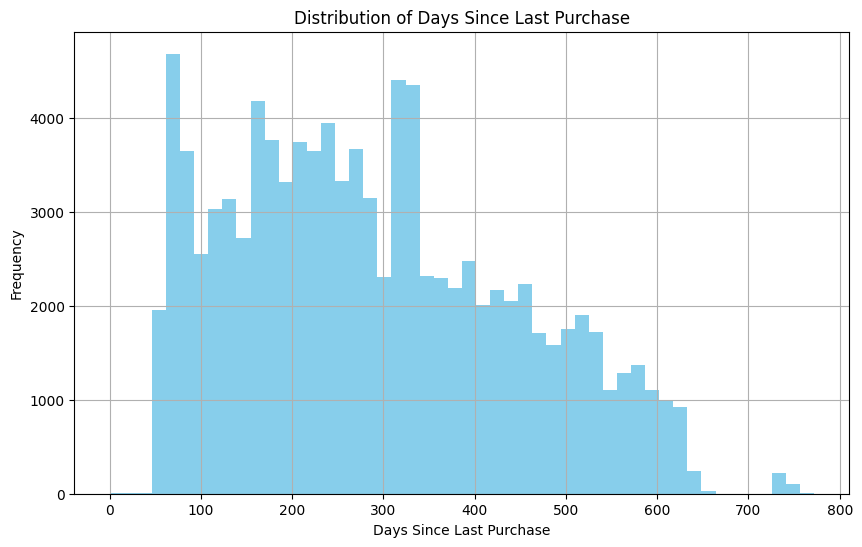

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(latest_purchase_df['days_since_last_purchase'], bins=50, color='skyblue')
plt.title('Distribution of Days Since Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [22]:
bins = [0, 30, 90, 180, 360, float('inf')]  
labels = ['0-30 days', '1-3 month', '3-6 months', '6 months-1 year', 'More than 1 year']

latest_purchase_df['purchase_interval'] = pd.cut(latest_purchase_df['days_since_last_purchase'], bins=bins, labels=labels)
grouped_customers = latest_purchase_df.groupby('purchase_interval').size().reset_index(name='customer_count')

print(grouped_customers)

  purchase_interval  customer_count
0         0-30 days               7
1         1-3 month            9780
2        3-6 months           18636
3   6 months-1 year           40292
4  More than 1 year           30724


/var/folders/y0/zzst_v5d021ddtqvlb85n6sw0000gn/T/ipykernel_91233/1566326764.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_customers = latest_purchase_df.groupby('purchase_interval').size().reset_index(name='customer_count')


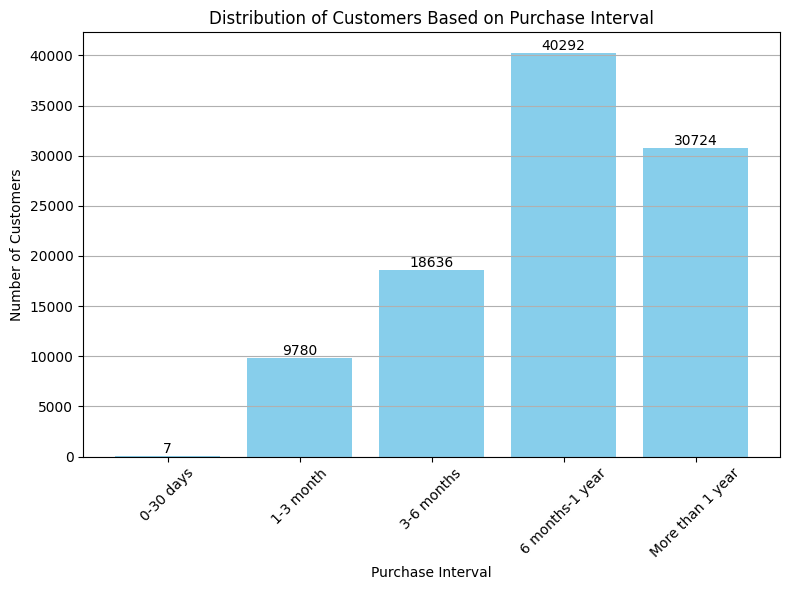

In [23]:
plt.figure(figsize=(8, 6))
bars = plt.bar(grouped_customers['purchase_interval'], grouped_customers['customer_count'], color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
plt.title('Distribution of Customers Based on Purchase Interval')
plt.xlabel('Purchase Interval')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  
plt.grid(axis='y') 
plt.tight_layout() 
plt.show()

In [24]:
merged_df = pd.merge(raw, latest_purchase_df, on='customer_id', how='left')
merged_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,latest_purchase_date,days_since_last_purchase,purchase_interval
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,4244733e06e7ecb4970a6e2683c13e61,...,SP,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,2017-09-13 08:59:02,399.0,More than 1 year
1,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,4244733e06e7ecb4970a6e2683c13e61,...,SP,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,2017-09-13 08:59:02,399.0,More than 1 year
2,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,4244733e06e7ecb4970a6e2683c13e61,...,SP,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,2017-09-13 08:59:02,399.0,More than 1 year
3,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,4244733e06e7ecb4970a6e2683c13e61,...,SP,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,2017-09-13 08:59:02,399.0,More than 1 year
4,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,4244733e06e7ecb4970a6e2683c13e61,...,SP,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,2017-09-13 08:59:02,399.0,More than 1 year


/var/folders/y0/zzst_v5d021ddtqvlb85n6sw0000gn/T/ipykernel_91233/3798658020.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = merged_df.groupby(['customer_id', 'purchase_interval'])[feature].first().reset_index()


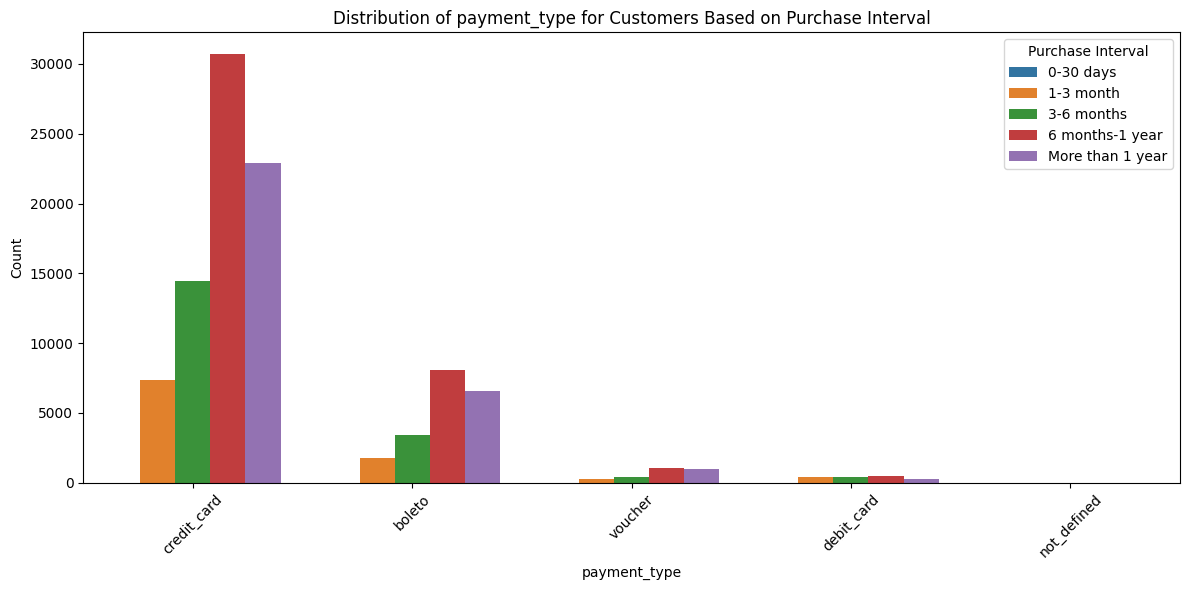

/var/folders/y0/zzst_v5d021ddtqvlb85n6sw0000gn/T/ipykernel_91233/3798658020.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = merged_df.groupby(['customer_id', 'purchase_interval'])[feature].first().reset_index()


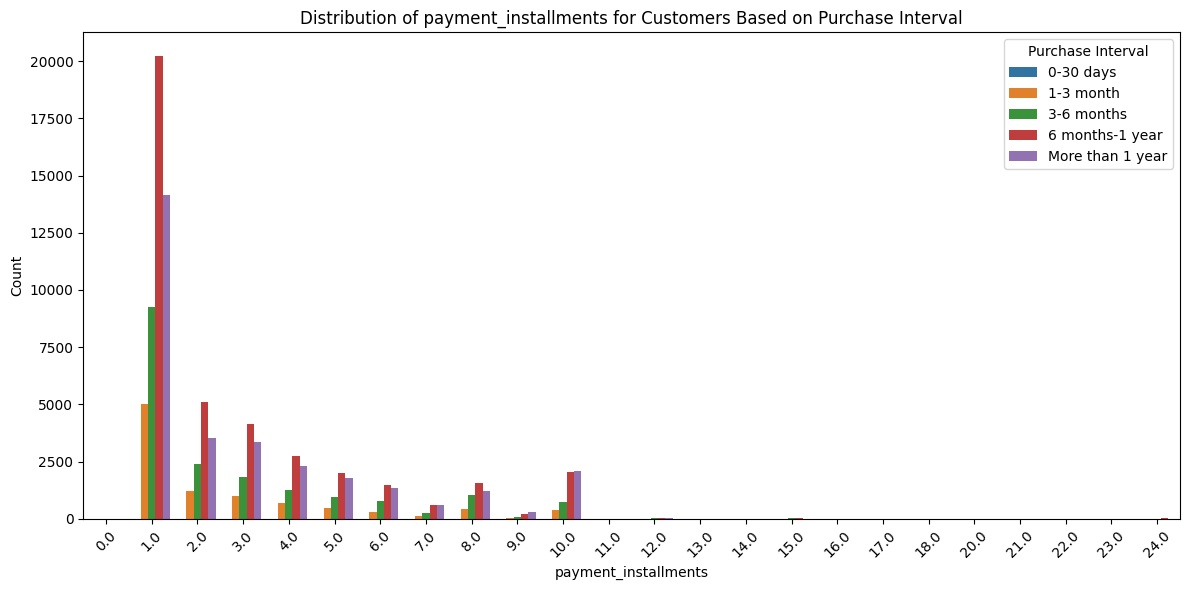

/var/folders/y0/zzst_v5d021ddtqvlb85n6sw0000gn/T/ipykernel_91233/3798658020.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = merged_df.groupby(['customer_id', 'purchase_interval'])[feature].first().reset_index()


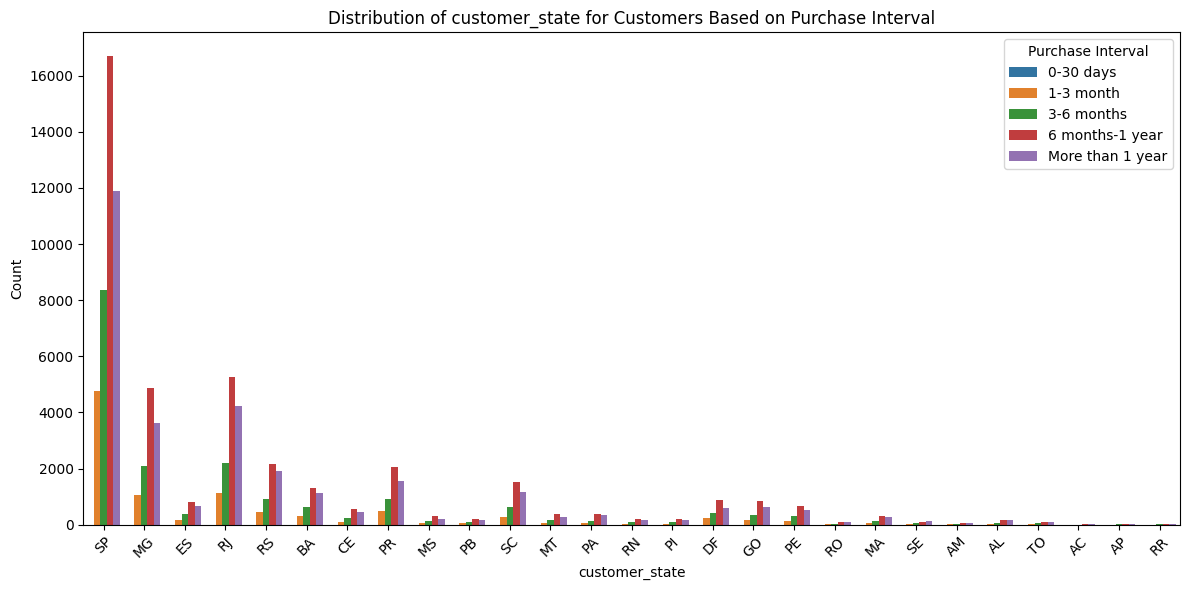

/var/folders/y0/zzst_v5d021ddtqvlb85n6sw0000gn/T/ipykernel_91233/3798658020.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = merged_df.groupby(['customer_id', 'purchase_interval'])[feature].first().reset_index()


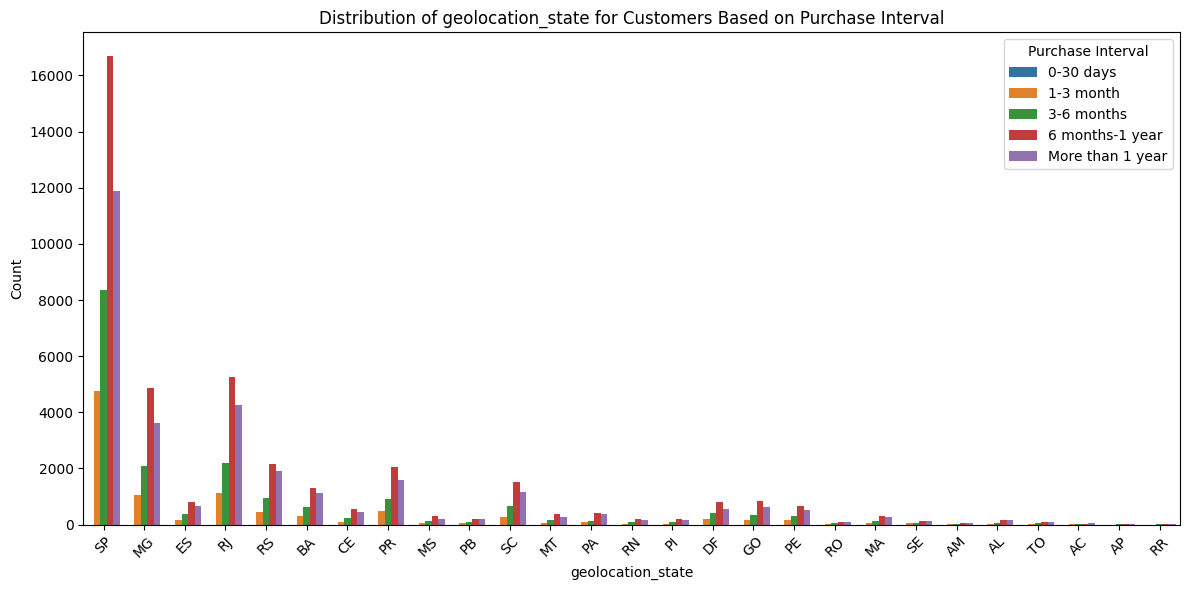

/var/folders/y0/zzst_v5d021ddtqvlb85n6sw0000gn/T/ipykernel_91233/3798658020.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = merged_df.groupby(['customer_id', 'purchase_interval'])[feature].first().reset_index()


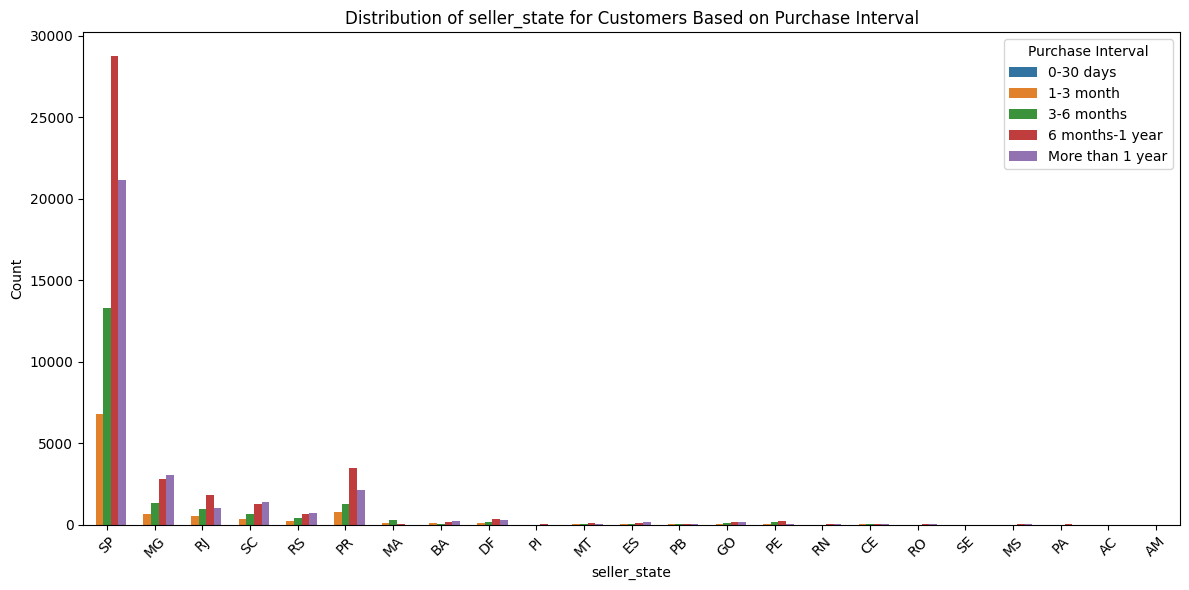

/var/folders/y0/zzst_v5d021ddtqvlb85n6sw0000gn/T/ipykernel_91233/3798658020.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = merged_df.groupby(['customer_id', 'purchase_interval'])[feature].first().reset_index()


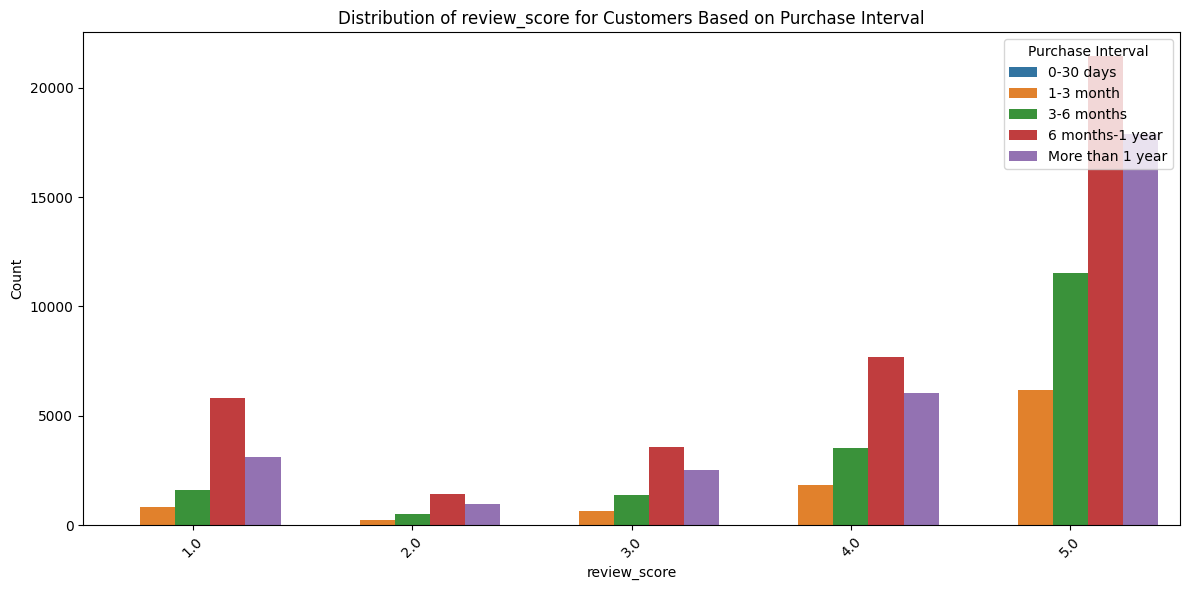

In [25]:
features = ['payment_type', 'payment_installments', 'customer_state', 'geolocation_state', 'seller_state', 'review_score']
for feature in features:
    grouped_data = merged_df.groupby(['customer_id', 'purchase_interval'])[feature].first().reset_index()
    
    plt.figure(figsize=(12, 6))
    sns.countplot(data=grouped_data, x=feature, hue='purchase_interval')
    plt.title(f'Distribution of {feature} for Customers Based on Purchase Interval')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Purchase Interval', loc='upper right')
    plt.tight_layout()
    plt.show()

In [26]:
merged_df.groupby('purchase_interval')['payment_value'].describe()

/var/folders/y0/zzst_v5d021ddtqvlb85n6sw0000gn/T/ipykernel_91233/2537497158.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('purchase_interval')['payment_value'].describe()


,count,mean,std,min,25%,50%,75%,max
purchase_interval,,,,,,,,
0-30 days,1503.0,176.536813,51.413058,80.38,137.03,197.55,221.54,221.54
1-3 month,1709355.0,172.748334,244.022572,0.00,62.21,111.65,192.15,6922.21
3-6 months,3330112.0,185.121884,304.685912,0.01,63.65,115.01,198.20,7274.88
6 months-1 year,7454886.0,174.303765,252.307501,0.00,62.50,111.71,190.44,6081.54
More than 1 year,5691861.0,168.767687,269.523361,0.00,59.42,105.06,187.94,13664.08


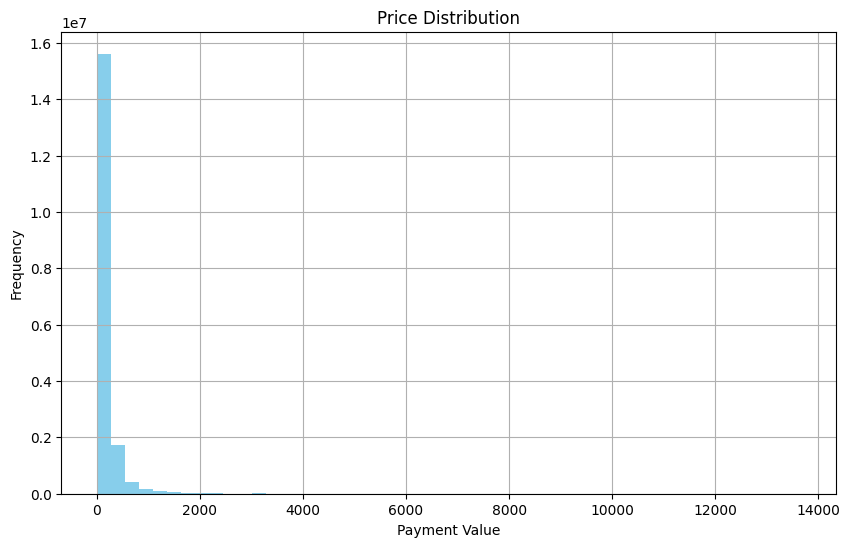

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(merged_df['payment_value'], bins=50, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Attributes to be analyzed: 'payment_value','product_category_name_english','seller_city', 'customer_city', etc.

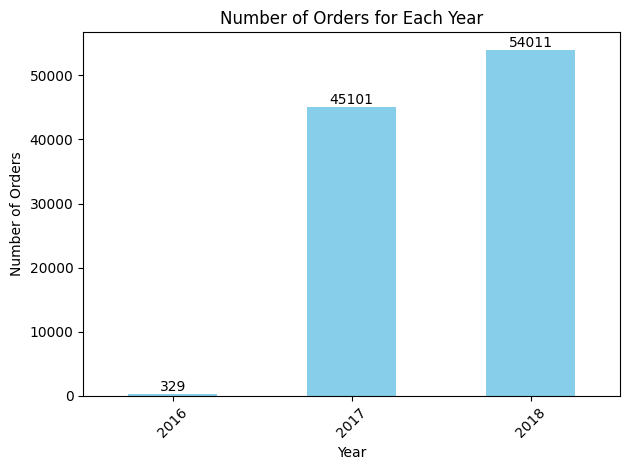

In [46]:
# how many orders are made per year -> year on year comparison
# merged_df['order_purchase_year'] = merged_df['order_purchase_timestamp'].dt.year.astype('Int64')

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['year'] = orders['order_purchase_timestamp'].dt.strftime('%Y')
orders['month'] = orders['order_purchase_timestamp'].dt.strftime('%m-%Y')

# Count the number of rows for each year
orders_per_year = orders['year'].value_counts().sort_index()

# Plot
ax = orders_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Each Year')
plt.xticks(rotation=45)

for i, count in enumerate(orders_per_year):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [47]:
#distribution of the number of orders regarding years and months
orders.groupby(by="year").order_id.nunique()

year
2016      329
2017    45101
2018    54011
Name: order_id, dtype: int64

In [48]:
orders.groupby(by="month").order_id.nunique()
#Y2016 only exists in 3 months, namely November, October and December. 
#Likewise for 2018, which is not even 1 year, only available from January to October, so that only 2017 has complete data about the number of orders.

month
01-2017     800
01-2018    7269
02-2017    1780
02-2018    6728
03-2017    2682
03-2018    7211
04-2017    2404
04-2018    6939
05-2017    3700
05-2018    6873
06-2017    3245
06-2018    6167
07-2017    4026
07-2018    6292
08-2017    4331
08-2018    6512
09-2016       4
09-2017    4285
09-2018      16
10-2016     324
10-2017    4631
10-2018       4
11-2017    7544
12-2016       1
12-2017    5673
Name: order_id, dtype: int64

          num_customer  percentage_customer
order_id                                   
1                93099            96.881244
2                 2745             2.856518
3                  203             0.211247
4                   30             0.031219
5                    8             0.008325
6                    6             0.006244
7                    3             0.003122
9                    1             0.001041
17                   1             0.001041


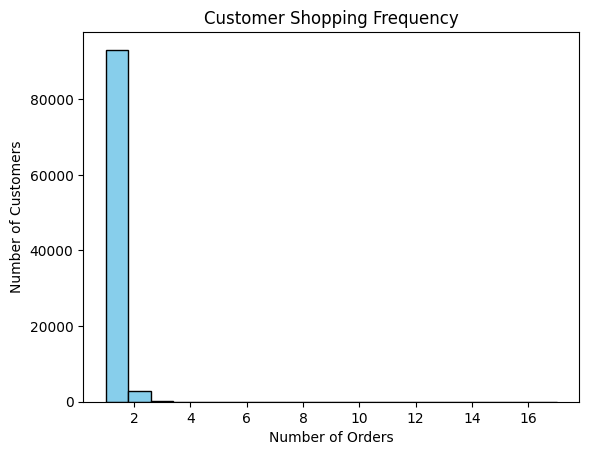

In [29]:
customer_shopping_frequency = raw.groupby('customer_unique_id')['order_id'].nunique()

# Counting the number of customers for each order count
order_count = customer_shopping_frequency.value_counts().sort_index()

# Calculating the percentage of customers for each order count
num_customer = order_count.sum()
percentage_customer = (order_count / num_customer) * 100

table_data = pd.DataFrame({
    'num_customer': order_count,
    'percentage_customer': percentage_customer
})
print(table_data) #approximately 96.9% of customers only purchase once with Olist -> big problem exists [year on year change?]

# Plotting histogram
plt.hist(customer_shopping_frequency, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Customer Shopping Frequency')
plt.show()

In [31]:
# correlation for non-categorical variables
relevant_columns = [
    'price',
    'freight_value',
    'payment_installments',
    'payment_value',
    'product_photos_qty',
    'review_score',
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date', #？
    'review_creation_date',
    'review_answer_timestamp'
]
relevant_df = raw[relevant_columns]

# Convert date columns to timestamps
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp']
for column in date_columns:
    raw[column] = pd.to_datetime(raw[column])

correlation_matrix = relevant_df.corr()

print(correlation_matrix)

                                  price  freight_value  payment_installments  \
price                          1.000000       0.427034              0.270781   
freight_value                  0.427034       1.000000              0.177722   
payment_installments           0.270781       0.177722              1.000000   
payment_value                  0.749691       0.375605              0.267924   
product_photos_qty             0.054730       0.025840              0.003029   
review_score                  -0.002341      -0.028530             -0.035473   
order_purchase_timestamp       0.002430       0.050343             -0.042382   
order_approved_at              0.003640       0.007628              0.011724   
order_delivered_carrier_date  -0.038152      -0.010927              0.000205   
order_delivered_customer_date -0.029084      -0.015899             -0.000462   
order_estimated_delivery_date  0.005868       0.063531             -0.038860   
review_creation_date          -0.009199 

In [32]:
#distribution of sellers
merged_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

merged_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

In [36]:
def range(series):
    return series.max() - series.min()

#price by product category
merged_df.groupby(by="product_category_name_english").agg({
    "product_id": "count",
    "price": ["max", "min", "mean", range]
}).sort_values(by=("product_id", "count"), ascending=False)

#bed_bath_table, health_beauty, furniture_decor are the categories with the most purchases. 
#Likewise, the prices sold in Brazilian E-Commerce are very varied even in one category, the range is quite large.

product_id    price                             
                                   count      max     min        mean    range
product_category_name_english                                                 
bed_bath_table                   1893596  1999.98    6.99   95.480311  1992.99
health_beauty                    1450047  3124.00    1.20  132.562389  3122.80
furniture_decor                  1424181  1899.00    4.90   88.452755  1894.10
sports_leisure                   1400020  4059.00    4.50  117.801346  4054.50
computers_accessories            1265546  3699.99    3.90  115.452185  3696.09
...                                  ...      ...     ...         ...      ...
arts_and_craftmanship               4423   289.49    9.80   63.063240   279.69
la_cuisine                          3240   389.00   24.00  128.714623   365.00
cds_dvds_musicals                   1413    65.00   45.00   50.661713    20.00
fashion_childrens_clothes           1095   110.00   39.99   80.922320    70.01
security_and_services                148   183.29  100.00  178.787838    83.29

[71 rows x 5 columns]

In [37]:
#distribution of sellers regarding their sales
merged_df.groupby(by="seller_id").agg({
    "product_id": "nunique",
    "order_id": "nunique",
    "price": ["max", "min", "mean", range]
}).sort_values(by=("order_id", "nunique"), ascending=False)
#sellers with more proudcts tend to have better sales

product_id order_id   price          \
                                    nunique  nunique     max     min   
seller_id                                                              
6560211a19b47992c3666cc44a7e94c0        256     1854  249.00   16.00   
4a3ca9315b744ce9f8e9374361493884        399     1806  884.00   12.90   
cc419e0650a3c5ba77189a1882b7556a         37     1706  229.99    6.00   
1f50f920176fa81dab994f9023523100         23     1404  119.90   38.90   
da8622b14eb17ae2831f4ac5b9dab84a        222     1314  429.90    9.90   
...                                     ...      ...     ...     ...   
ceb7b4fb9401cd378de7886317ad1b47          1        1  399.90  399.90   
cecd97bc34ed8330bd4cd15713eda670          1        1   57.99   57.99   
5b92bfa4120daa27c574daa2e386c693          1        1   14.00   14.00   
5aaa890629f83706d8d9bfecd8377c1c          1        1   48.90   48.90   
7d81e74a4755b552267cd5e081563028          1        1   32.50   32.50   

                                                      
                                        mean   range  
seller_id                                             
6560211a19b47992c3666cc44a7e94c0   60.431330  233.00  
4a3ca9315b744ce9f8e9374361493884  102.097226  871.10  
cc419e0650a3c5ba77189a1882b7556a   57.615706  223.99  
1f50f920176fa81dab994f9023523100   55.492426   81.00  
da8622b14eb17ae2831f4ac5b9dab84a  112.912041  420.00  
...                                      ...     ...  
ceb7b4fb9401cd378de7886317ad1b47  399.900000    0.00  
cecd97bc34ed8330bd4cd15713eda670   57.990000    0.00  
5b92bfa4120daa27c574daa2e386c693   14.000000    0.00  
5aaa890629f83706d8d9bfecd8377c1c   48.900000    0.00  
7d81e74a4755b552267cd5e081563028   32.500000    0.00  

[3095 rows x 6 columns]